# Data Files
- ./time_series_covid19_confirmed_HOU.csv - COVID-19 Confirmed Cases data(01/22 to 09/04) 
- ./time_series_covid19_death_HOU.csv - COVID-19 Deceased Cases data(01/22 to 09/04) 


- ./austin_hosp_0904.xlsx - Hospitalization Data at Austin County (04/01 to 09/04)
- ./brazoria_hosp_0904.xlsx - Hospitalization Data at Brazoria County (04/01 to 09/04)
- ./chambers_hosp_0904.xlsx - Hospitalization Data at Chambers County (04/01 to 09/04)
- ./fortbend_hosp_0904.xlsx - Hospitalization Data at Fortbend County (04/01 to 09/04)
- ./galveston_hosp_0904.xlsx - Hospitalization Data at Galveston County (04/01 to 09/04)
- ./harris_hosp_0904.xlsx - Hospitalization Data at Harris County (04/01 to 09/04)
- ./liberty_hosp_0904.xlsx - Hospitalization Data at Liberty County (04/01 to 09/04)
- ./montgomery_hosp_0904.xlsx - Hospitalization Data at Montgomery County (04/01 to 09/04)


- ./applemobilitytrends-2020-09-04.csv - Apple's Mobility Data(01/13 to 09/04) 


- ./mask_use_HOU.csv - COVID-19 Mask Usage Survey(Interviewed 07/02 to 07/14)


- ./Texas COVID-19 Hospitalizations over Time by TSA Region.xlsx - COVID-19 Hospitalization data
- ./Texas Hospital Capacity over Time by TSA Region.xlsx - COVID-19 Hospitalization Capacity data


- ./UID_ISO_FIPS_LookUp_Table.csv - County FIPS and population data

## COVID-19 confirmed cases data
Confirmed cases data consists of accumulated confirmed cases at 9 counties in Greater Houston between 03/01/2020 and 08/15/2020. In addition, longitude, latitude, and FIPS are provided, which may serve as foreign keys to query mask survey data.

## COVID-19 deceased cases data
Deceased data consists of accumulated deceased cases at 9 counties in Greater Houston between 03/01/2020 and 08/15/2020. In addition, longitude, latitude, and FIPS are provided, which may serve as foreign keys to query mask survey data.

## COVID-19 mask usage survey
COVID-19 mask usage survey conducted by The New York Times to estimate the mask usage by county in the United States. Data comes from over 250,000 online interviews between 07/02/2020 and 07/14/2020. Specifically, each interview involves how often the participant wears a mask publicly when he or she expects to be within six feet of another person.

## COVID-19 Hospitalization data
The hospitalization data in TX includes incident rate, estimated active cases, testing number, and available hospitalization rate from CSSE. Some portion of the data is missing, such as estimated hospitalization and hospitalization rate after reopening (04/28/2020). But hospitalization and hospital capacity is available from TSA Region data.

## County FIPS and population data
FIPS data is used to check county code and population. It’s in a single csv file.

In [1]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression, BayesianRidge, LinearRegression
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

In [2]:
# File Paths
import os

path_parent = os.getcwd()
print(path_parent)

confirmed_cases_path = os.path.join(path_parent, 'Data Files/time_series_covid19_confirmed_HOU.csv')
death_cases_path = os.path.join(path_parent, 'Data Files/time_series_covid19_death_HOU.csv')

hosp_austin_path = os.path.join(path_parent, 'Data Files/austin_hosp_0904.xlsx')
hosp_brazoria_path = os.path.join(path_parent, 'Data Files/brazoria_hosp_0904.xlsx')
hosp_chambers_path = os.path.join(path_parent, 'Data Files/chambers_hosp_0904.xlsx')
hosp_fortbend_path = os.path.join(path_parent, 'Data Files/fortbend_hosp_0904.xlsx')
hosp_galveston_path = os.path.join(path_parent, 'Data Files/galveston_hosp_0904.xlsx')
hosp_harris_path = os.path.join(path_parent, 'Data Files/harris_hosp_0904.xlsx')
hosp_liberty_path = os.path.join(path_parent, 'Data Files/liberty_hosp_0904.xlsx')
hosp_montgomery_path = os.path.join(path_parent, 'Data Files/montgomery_hosp_0904.xlsx')

apple_mobility_path = os.path.join(path_parent, 'Data Files/applemobilitytrends-2020-09-04.csv')
mask_usage_path = os.path.join(path_parent, 'Data Files/mask_use_HOU.csv')
fips_path = os.path.join(path_parent, 'Data Files/UID_ISO_FIPS_LookUp_Table.csv')

hosp_tx_xlsx_path = os.path.join(path_parent, 'Data Files/Texas COVID-19 Hospitalizations over Time by TSA Region.xlsx')
hosp_capa_path = os.path.join(path_parent, 'Data Files/Texas Hospital Capacity over Time by TSA Region.xlsx')

/Users/irpan/Desktop/Coding/COVID Datathon


In [3]:
%%time
df_confirmed_cases = pd.read_csv(confirmed_cases_path) 
df_confirmed_cases = df_confirmed_cases.loc[(df_confirmed_cases['Admin2']!='Waller')]
df_confirmed_cases

CPU times: user 40.5 ms, sys: 10.2 ms, total: 50.8 ms
Wall time: 407 ms


,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20
0,84048015,US,USA,840,48015.0,Austin,Texas,US,29.885487,-96.277369,...,401,413,417,417,418,419,419,434,440,441
1,84048039,US,USA,840,48039.0,Brazoria,Texas,US,29.187574,-95.445632,...,9093,9220,9309,9389,9419,9592,9591,9670,9642,9817
2,84048071,US,USA,840,48071.0,Chambers,Texas,US,29.709720,-94.671545,...,1123,1123,1123,1123,1149,1155,1166,1166,1166,1166
3,84048157,US,USA,840,48157.0,Fort Bend,Texas,US,29.527045,-95.772195,...,14845,14933,14933,14957,14983,15036,15081,15100,15144,15144
4,84048167,US,USA,840,48167.0,Galveston,Texas,US,29.401673,-94.904691,...,10509,10543,10543,10575,10613,10646,10715,10780,10808,10808
5,84048201,US,USA,840,48201.0,Harris,Texas,US,29.858649,-95.393395,...,103088,104649,105757,106595,107490,108085,108819,109834,110762,111525
6,84048291,US,USA,840,48291.0,Liberty,Texas,US,30.151527,-94.812056,...,1670,1786,1826,1826,1829,1835,1860,1843,1879,1881
7,84048339,US,USA,840,48339.0,Montgomery,Texas,US,30.300791,-95.505728,...,8580,8580,8580,8736,8800,8904,9046,9164,9164,9164


In [194]:
%%time
df_death_cases = pd.read_csv(death_cases_path)
df_death_cases = df_death_cases.loc[df_death_cases['Admin2']!='Waller']
df_death_cases

CPU times: user 37.4 ms, sys: 6.43 ms, total: 43.8 ms
Wall time: 39.1 ms


,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20
0,84048015,US,USA,840,48015.0,Austin,Texas,US,29.885487,-96.277369,...,5,5,6,6,6,6,6,6,6,6
1,84048039,US,USA,840,48039.0,Brazoria,Texas,US,29.187574,-95.445632,...,130,131,134,137,138,138,138,139,143,145
2,84048071,US,USA,840,48071.0,Chambers,Texas,US,29.709720,-94.671545,...,5,5,5,5,5,5,5,5,5,5
3,84048157,US,USA,840,48157.0,Fort Bend,Texas,US,29.527045,-95.772195,...,226,230,231,231,234,237,239,240,243,244
4,84048167,US,USA,840,48167.0,Galveston,Texas,US,29.401673,-94.904691,...,135,136,137,137,140,140,140,142,143,143
5,84048201,US,USA,840,48201.0,Harris,Texas,US,29.858649,-95.393395,...,2106,2140,2153,2177,2188,2192,2208,2247,2281,2300
6,84048291,US,USA,840,48291.0,Liberty,Texas,US,30.151527,-94.812056,...,41,42,42,43,43,43,43,43,43,44
7,84048339,US,USA,840,48339.0,Montgomery,Texas,US,30.300791,-95.505728,...,117,119,120,120,120,122,125,130,132,132


In [195]:
# drop useless cols
df_confirmed_cases_processed = df_confirmed_cases
df_confirmed_cases_processed = df_confirmed_cases_processed.drop(['UID', 'iso2', 'iso3', 'code3', 'Province_State', 'Country_Region', 'Lat', 'Long_', 'Combined_Key'], axis=1)
df_confirmed_cases_processed

,FIPS,Admin2,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20
0,48015.0,Austin,0,0,0,0,0,0,0,0,...,401,401,401,413,417,417,418,419,419,434
1,48039.0,Brazoria,0,0,0,0,0,0,0,0,...,8886,8981,9093,9220,9309,9389,9419,9592,9591,9670
2,48071.0,Chambers,0,0,0,0,0,0,0,0,...,1123,1123,1123,1123,1123,1123,1149,1155,1166,1166
3,48157.0,Fort Bend,0,0,0,0,0,0,0,0,...,14761,14761,14845,14933,14933,14957,14983,15036,15081,15100
4,48167.0,Galveston,0,0,0,0,0,0,0,0,...,10430,10430,10509,10543,10543,10575,10613,10646,10715,10780
5,48201.0,Harris,0,0,0,0,0,0,0,0,...,101077,101670,103088,104649,105757,106595,107490,108085,108819,109834
6,48291.0,Liberty,0,0,0,0,0,0,0,0,...,1665,1670,1670,1786,1826,1826,1829,1835,1860,1843
7,48339.0,Montgomery,0,0,0,0,0,0,0,0,...,8515,8515,8580,8580,8580,8736,8800,8904,9046,9164


In [196]:
# drop useless cols
df_death_cases_processed = df_death_cases
df_death_cases_processed = df_death_cases_processed.drop(['Population','UID', 'iso2', 'iso3', 'code3', 'Province_State', 'Country_Region', 'Lat', 'Long_', 'Combined_Key'], axis=1)
df_death_cases_processed

,FIPS,Admin2,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20
0,48015.0,Austin,0,0,0,0,0,0,0,0,...,5,5,6,6,6,6,6,6,6,6
1,48039.0,Brazoria,0,0,0,0,0,0,0,0,...,130,131,134,137,138,138,138,139,143,145
2,48071.0,Chambers,0,0,0,0,0,0,0,0,...,5,5,5,5,5,5,5,5,5,5
3,48157.0,Fort Bend,0,0,0,0,0,0,0,0,...,226,230,231,231,234,237,239,240,243,244
4,48167.0,Galveston,0,0,0,0,0,0,0,0,...,135,136,137,137,140,140,140,142,143,143
5,48201.0,Harris,0,0,0,0,0,0,0,0,...,2106,2140,2153,2177,2188,2192,2208,2247,2281,2300
6,48291.0,Liberty,0,0,0,0,0,0,0,0,...,41,42,42,43,43,43,43,43,43,44
7,48339.0,Montgomery,0,0,0,0,0,0,0,0,...,117,119,120,120,120,122,125,130,132,132


In [197]:
for null_count in df_confirmed_cases_processed.isnull().sum():
    if null_count > 0:
        print(null_count)
        
for null_count in df_death_cases_processed.isnull().sum():
    if null_count > 0:
        print(null_count)

In [198]:
%%time
df_mask_usage = pd.read_csv(mask_usage_path)
df_mask_usage = df_mask_usage.loc[df_mask_usage['COUNTYFP'] != 48473]
df_mask_usage

CPU times: user 7.51 ms, sys: 1.48 ms, total: 8.99 ms
Wall time: 11.4 ms


,COUNTYFP,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS
0,48015,0.006,0.024,0.054,0.224,0.692
1,48039,0.021,0.042,0.075,0.170,0.691
2,48071,0.027,0.094,0.078,0.201,0.600
3,48157,0.024,0.030,0.057,0.115,0.774
4,48167,0.033,0.037,0.105,0.207,0.617
5,48201,0.019,0.024,0.069,0.152,0.736
6,48291,0.019,0.034,0.114,0.182,0.650
7,48339,0.031,0.073,0.061,0.145,0.690


In [199]:
%%time
df_fips = pd.read_csv(fips_path)

fips_lst = []
for fips in df_confirmed_cases['FIPS']:
    fips_lst.append(fips)

df_fips = df_fips.loc[df_fips['FIPS'].isin(fips_lst)]   

land_area = {'Austin': 646.5,
 'Brazoria': 1357.7,
 'Chambers': 597.1,
 'Fort Bend': 861.5,
 'Galveston': 378.4,
 'Harris': 1703.5,
 'Liberty': 1158.4,
 'Montgomery': 1041.7}

df_fips['Land Area'] = list(land_area.values())

pop_density = []
for i in range(len(df_fips['Population'])):
    pop = list(df_fips['Population'])[i]
    area = list(df_fips['Land Area'])[i]
    pop_density.append(pop/area)

df_fips['Population Density'] =  pop_density

# scales the population density from 0 to 1 
min_max_scaler = MinMaxScaler()
df_fips['Population Density Scaled'] =  min_max_scaler.fit_transform(np.array(pop_density).reshape(-1, 1))

df_population = df_fips.drop(['UID', 'iso2', 'iso3', 'code3', 'Province_State', 'Country_Region', 'Lat', 'Long_', 'Combined_Key'], axis=1)
df_population


CPU times: user 23.4 ms, sys: 3.66 ms, total: 27 ms
Wall time: 27.3 ms


,FIPS,Admin2,Population,Land Area,Population Density,Population Density Scaled
3541,48015.0,Austin,30032.0,646.5,46.453210,0.000000
3553,48039.0,Brazoria,374264.0,1357.7,275.660308,0.084255
3569,48071.0,Chambers,43837.0,597.1,73.416513,0.009912
3612,48157.0,Fort Bend,811688.0,861.5,942.179919,0.329264
3617,48167.0,Galveston,342139.0,378.4,904.172833,0.315292
3634,48201.0,Harris,4713325.0,1703.5,2766.847667,1.000000
3679,48291.0,Liberty,88219.0,1158.4,76.155905,0.010919
3703,48339.0,Montgomery,607391.0,1041.7,583.076702,0.197259


In [200]:
county_lst = []
for county in df_confirmed_cases['Admin2']:
    county_lst.append(str(county)+' County')
county_lst

['Austin County',
 'Brazoria County',
 'Chambers County',
 'Fort Bend County',
 'Galveston County',
 'Harris County',
 'Liberty County',
 'Montgomery County']

In [201]:
df_hosp_austin =  pd.read_excel(hosp_austin_path)
df_hosp_brazoria =  pd.read_excel(hosp_brazoria_path)
df_hosp_chambers =  pd.read_excel(hosp_chambers_path)
df_hosp_fortbend =  pd.read_excel(hosp_fortbend_path)
df_hosp_galveston =  pd.read_excel(hosp_galveston_path)
df_hosp_harris =  pd.read_excel(hosp_harris_path)
df_hosp_liberty =  pd.read_excel(hosp_liberty_path)
df_hosp_montgomery =  pd.read_excel(hosp_montgomery_path)

In [202]:
%%time
df_apple_mobility = pd.read_csv(apple_mobility_path)
df_apple_mobility = df_apple_mobility.loc[(df_apple_mobility['sub-region']=='Texas') & (df_apple_mobility['region'].isin(county_lst))]   
df_apple_mobility = df_apple_mobility.drop(['geo_type', 'alternative_name', 'sub-region', 'country'], axis=1)

CPU times: user 300 ms, sys: 36.6 ms, total: 337 ms
Wall time: 391 ms


<string>:2: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.


In [203]:
df_apple_mobility.isnull().sum()
count = 0
for null_count in df_apple_mobility.isnull().sum():
    if null_count > 0:
        print(null_count, count)
    count +=1
## Some data for May 11-12 is missing.

8 121
8 122


In [204]:
## consistent date format

# cases dfs
new_cases_col = list(df_confirmed_cases_processed.columns[:2])
for date in df_confirmed_cases_processed.columns[2:]:
    new_date = datetime.datetime.strptime(date, '%m/%d/%y').strftime('%Y%m%d')
    new_cases_col.append(new_date)

df_confirmed_cases_processed.columns = new_cases_col
df_death_cases_processed.columns = new_cases_col

# mobility df
new_mobility_col = list(df_apple_mobility.columns[:2])
for date in df_apple_mobility.columns[2:]:
    new_date = datetime.datetime.strptime(date, '%Y-%m-%d').strftime('%Y%m%d')
    new_mobility_col.append(new_date)

df_apple_mobility.columns = new_mobility_col

# hosp dfs
def change_date_format_1(df_hosp):
    new_hosp_dates = []
    for date in df_hosp.astype({'Date': 'string'})['Date']:
        new_date = datetime.datetime.strptime(str(date), '%Y-%m-%d').strftime('%Y%m%d')
        new_hosp_dates.append(new_date)

    df_hosp['Date'] = new_hosp_dates
    
def change_date_format_2(df_hosp):
    new_hosp_dates = []
    for date in df_hosp.astype({'Date': 'string'})['Date']:
        new_date = datetime.datetime.strptime(str(date), '%m/%d/%y').strftime('%Y%m%d')
        new_hosp_dates.append(new_date)

    df_hosp['Date'] = new_hosp_dates

    
change_date_format_1(df_hosp_austin)
change_date_format_1(df_hosp_chambers)
change_date_format_1(df_hosp_fortbend)
change_date_format_1(df_hosp_liberty)
change_date_format_1(df_hosp_montgomery)

change_date_format_2(df_hosp_brazoria)
change_date_format_2(df_hosp_galveston)
change_date_format_2(df_hosp_harris)

In [301]:
# start from 20200401
dates_starting_april = list(df_hosp_austin['Date'])
days_since_april = [i for i in range(len(dates_starting_april))]

# drop dates before 20200401 in dfs
df_confirmed_cases_processed = df_confirmed_cases_processed[list(df_confirmed_cases_processed.columns[:2]) + dates_starting_april]
df_death_cases_processed = df_death_cases_processed[list(df_death_cases_processed.columns[:2]) + dates_starting_april]
df_apple_mobility = df_apple_mobility[list(df_apple_mobility.columns[:2]) + dates_starting_april]

# predict 7 days
days_next = 7
future_days = [i for i in range(len(dates_starting_april) + days_next)]

In [302]:
# Reshape our arays for sklearn
days_since_april = np.array(days_since_april).reshape(-1, 1)
future_days = np.array(future_days).reshape(-1, 1)

In [303]:
def svm_reg(X_train, X_test, y_train, y_test, future_forecast, state):
        
    svm_confirmed = SVR(shrinking=True, kernel='poly',gamma=0.01, epsilon=1, degree=4, C=0.1)
    svm_confirmed.fit(X_train, y_train)
    test_svm_pred = svm_confirmed.predict(X_test)
    svm_pred = svm_confirmed.predict(future_forecast)
    
    plt.plot(y_test)
    plt.plot(test_svm_pred)
    plt.title('Testing Set Evaluation for {}'.format(state))
    plt.xlabel('Days since April 1st')
    plt.ylabel('# of confirmed coronavirus cases')
    plt.legend(['Actual', 'Predicted'])
    plt.show()
    
    print('MAE:', mean_absolute_error(test_svm_pred, y_test))
    print('MSE:',mean_squared_error(test_svm_pred, y_test))

    # plot the graph to see compare predictions and actual coronavirus cases
    plt.plot(confirmed)
    plt.plot(svm_pred)
    plt.title('Coronavirus Cases in {}'.format(state))
    plt.legend(['Actual cases', 'Predicted cases using support vector regression'])
    plt.xlabel('Days since April 1st')
    plt.ylabel('# of confirmed coronavirus cases')
    plt.show()
    print('Completed:', state)

In [304]:
def bayesian_ridge(X_train, X_test, y_train, y_test, future_forecast, state):
        
    # convert data to be compatible with polynomial regression
    bayesian_poly = PolynomialFeatures(degree=3)
    bayesian_poly_X_train = bayesian_poly.fit_transform(X_train)
    bayesian_poly_X_test = bayesian_poly.fit_transform(X_test)
    bayesian_poly_future_forecast = bayesian_poly.fit_transform(future_forecast)
    
    # polynomial regression model
    # bayesian ridge polynomial regression
    tol = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2]
    alpha_1 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
    alpha_2 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
    lambda_1 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
    lambda_2 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
    normalize = [True, False]
    fit_intercept = [True,  False]
    lambda_init = [1e-2, 1e-1, 1, 1e1]

    bayesian_grid = {'tol': tol, 'alpha_1': alpha_1, 'alpha_2' : alpha_2, 'lambda_1': lambda_1, 'lambda_2' : lambda_2, 
                    'normalize' : normalize, 'fit_intercept': fit_intercept, 'lambda_init' : lambda_init}

    bayesian = BayesianRidge()
    bayesian_search = RandomizedSearchCV(bayesian, bayesian_grid, scoring='neg_root_mean_squared_error', cv=3, return_train_score=True, n_jobs=-1, n_iter=200, verbose=1)
    bayesian_search.fit(bayesian_poly_X_train, y_train)
    
    # get the best estimator 
    best_params = bayesian_search.best_params_
    bayesian_confirmed = BayesianRidge(**best_params)
    bayesian_confirmed.fit(bayesian_poly_X_train, y_train)
    
    test_bayesian_pred = bayesian_confirmed.predict(bayesian_poly_X_test)
    bayesian_pred = bayesian_confirmed.predict(bayesian_poly_future_forecast)
    
    plt.plot(y_test)
    plt.plot(test_bayesian_pred)
    plt.title('Testing Set Evaluation for {}'.format(state))
    plt.xlabel('Days since April 1st')
    plt.ylabel('# of confirmed coronavirus cases')
    plt.legend(['Actual', 'Predicted'])
    plt.show()
    
    print('MAE:', mean_absolute_error(test_bayesian_pred, y_test))
    print('MSE:',mean_squared_error(test_bayesian_pred, y_test))
    print('Weight:', bayesian_confirmed.coef_)

    # plot the graph to see compare predictions and actual coronavirus cases
    plt.plot(confirmed)
    plt.plot(bayesian_pred)
    plt.title('Coronavirus Cases in {}'.format(state))
    plt.legend(['Actual cases', 'Predicted cases using bayesian ridge'])
    plt.xlabel('Days since April 1st')
    plt.ylabel('# of confirmed coronavirus cases')
    plt.show()
    print('Completed:', state)

In [305]:
# helper function for finding daily change 
def daily_change(y2, y1):
    return (y2-y1)

In [306]:
# get moving average for confirmed case(our label)
def moving_confirmed_cases(data, window_size):
    moving_confirmed = []
    for i in range(len(data)):
        if i + window_size < len(data):
            moving_confirmed.append(np.mean(data[i:i+window_size]))
        else:
            moving_confirmed.append(np.mean(data[i:len(data)]))
    return moving_confirmed

In [307]:
# def future_testing_extrapolation(X, y, future_forecast, state):
#     poly = PolynomialFeatures(degree=3)
#     poly_X = poly.fit_transform(X)
#     poly_future_forecast = poly.fit_transform(future_forecast)
    
#     poly_confirmed = LinearRegression(fit_intercept=True, normalize=True)
#     poly_confirmed.fit(poly_X, y)
    
#     poly_pred = poly_confirmed.predict(poly_future_forecast)
    
#     plt.plot(y)
#     plt.plot(poly_pred)
#     plt.title('Coronavirus testing in {}'.format(state))
#     plt.legend(['Actual testing', 'Predicted testing using polynomial regression'])
#     plt.xlabel('Days since April 1st')
#     plt.ylabel('# of testing')
#     plt.show()
    
#     future_increases = [] 
    
#     # calulate future rates of change 
#     for i in range(days_ahead):
#         c = len(X) - 1
#         future_increases.append(daily_change(poly_pred[c+i+1], poly_pred[c+i]))
#     return future_increases

In [308]:
# We are taking winodws averages for our mobility data. 
# It will give us a better view of the situation.
def window_average(window_size, data, method):
    avg_data = [] 
    date_length = len(data)
    
    for i in range(len(data)):
        remainder = i % window_size 
        if method == 'median':
            if i - remainder + window_size - 1 < date_length:
                avg_data.append(np.median(data[i-remainder:i-remainder+window_size-1]))
            else:
                delta = date_length % window_size 
                avg_data.append(np.median(data[date_length-delta-1:date_length-1]))
        elif method == 'mean':
            if i - remainder + window_size - 1 < date_length:
                avg_data.append(np.mean(data[i-remainder:i-remainder+window_size-1]))
            else:
                delta = date_length % window_size 
                avg_data.append(np.mean(data[date_length-delta-1:date_length-1]))
        else:
            warnings.warn('Methods can only be mean or median')
            
    return avg_data

In [309]:
# returns true if it is a weekend, and false if it is a weekday 
def weekday_or_weekend(date):
    date_obj = datetime.datetime.strptime(str(date), '%Y%m%d')
    day_of_the_week =  date_obj.weekday()
    if (day_of_the_week+1) % 6 == 0 or (day_of_the_week+1) % 7 == 0:
        return True 
    else:
        return False 

In [310]:
# gets the mobility information of a particular day
def get_mobility(transport_type, state, day):
    return df_apple_mobility[df_apple_mobility['region']== (str(county)+' County')][df_apple_mobility['transportation_type']==transport_type].sum()[day]


In [311]:
counties = list(df_confirmed_cases_processed['Admin2'])
for county in counties:
    print(county)
    for i in range(len(dates_starting_april)):
        #print(df_population[df_population.Admin2==county]['Population Density Scaled'].max())
        #print(df_confirmed_cases_processed[df_confirmed_cases_processed.Admin2==county][dates_starting_april[i]].sum())


SyntaxError: unexpected EOF while parsing (<ipython-input-311-676fd8d45ca8>, line 6)

/Users/irpan/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/irpan/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


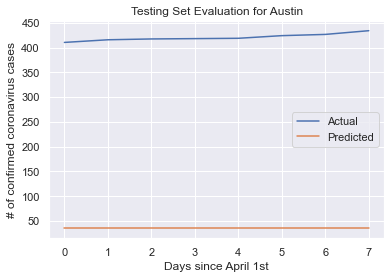

MAE: 385.7291666666667
MSE: 148834.09375


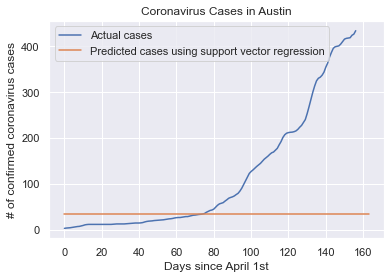

Completed: Austin
Fitting 3 folds for each of 200 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    9.2s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:   10.2s finished
/Users/irpan/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/irpan/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


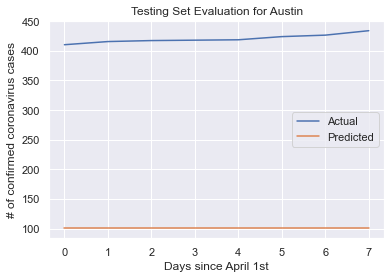

MAE: 320.18326928479144
MSE: 102564.42966253615
Weight: [ 1.18093213e+00  2.36186425e+00  6.31088724e-29 -1.88064512e-30
 -1.04252398e-31  4.72372850e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  9.44745701e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00]


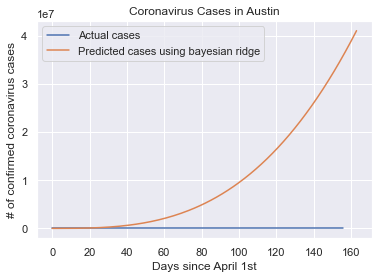

Completed: Austin


/Users/irpan/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/irpan/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


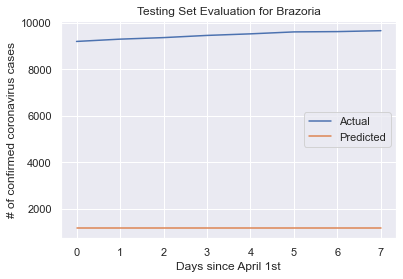

MAE: 8317.37500103238
MSE: 69203369.75328448


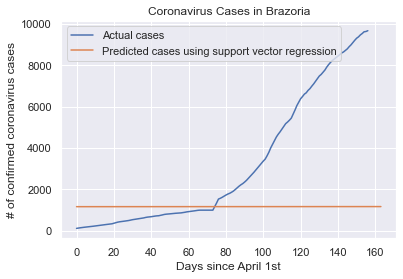

Completed: Brazoria
Fitting 3 folds for each of 200 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 200 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    3.8s finished
/Users/irpan/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/irpan/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


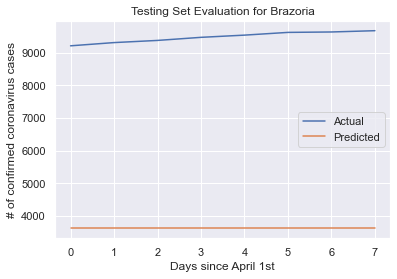

MAE: 5855.626316040683
MSE: 34313002.39859429
Weight: [ 1.02975051e-12  2.29984512e-12  3.34458757e-12  1.43726988e+02
 -1.55126814e+01 -5.83082180e-14 -1.10319333e-12  2.87453976e+02
 -3.10253627e+01 -6.25030260e-16  1.21097313e+01 -1.30702247e+00
  1.86302668e+02  4.47595292e+01 -8.65741821e+01 -3.25762325e-15
 -7.59944302e-13  5.74907953e+02 -6.20507255e+01  8.10058742e-15
  2.42194626e+01 -2.61404494e+00  3.72605335e+02  8.95190584e+01
 -1.73148364e+02  7.40219810e-16  1.02030658e+00 -1.10123305e-01
  1.56969493e+01  3.77121846e+00 -7.29431609e+00  1.86938090e+02
  7.98840680e+01 -4.75049323e+01 -1.56974308e+02]


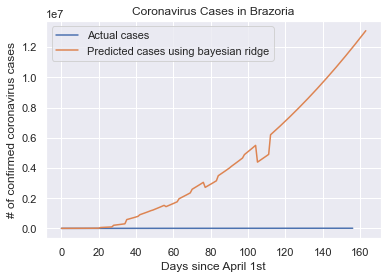

Completed: Brazoria


/Users/irpan/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/irpan/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


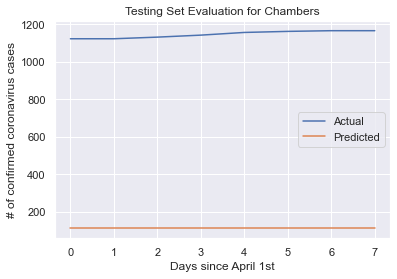

MAE: 1036.0416666666667
MSE: 1073689.3750000002


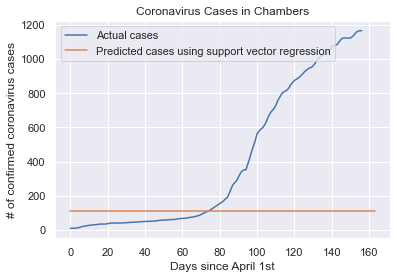

Completed: Chambers
Fitting 3 folds for each of 200 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 312 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    1.7s finished
/Users/irpan/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/irpan/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


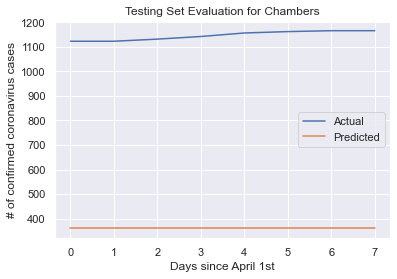

MAE: 786.2209587501309
MSE: 618450.4359085306
Weight: [ 4.23700353e+00  8.47400706e+00  4.19952379e-02 -5.73236953e-16
 -3.38519494e-21  1.69480141e+01  8.39904758e-02  2.67806638e-20
  4.55526480e-19  4.16237559e-04 -6.79434390e-23 -1.26389153e-33
 -9.14816724e-34  1.92592994e-34  3.52648305e-38  3.38960282e+01
  1.67980952e-01  1.00445074e-41 -2.08809743e-53  8.32475117e-04
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  4.12555599e-06  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00]


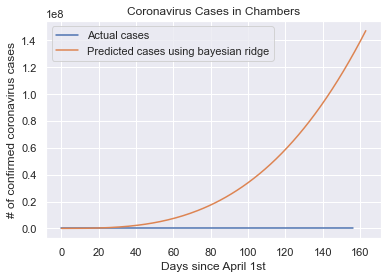

Completed: Chambers


/Users/irpan/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/irpan/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


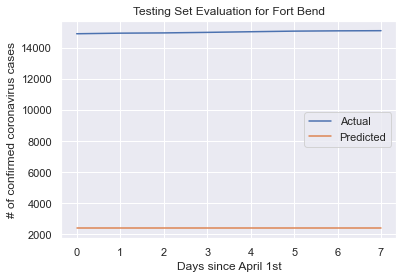

MAE: 12620.645834204752
MSE: 159285467.13657904


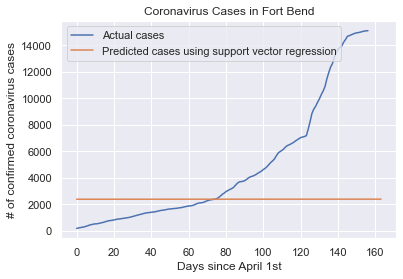

Completed: Fort Bend
Fitting 3 folds for each of 200 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    3.1s finished
/Users/irpan/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/irpan/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


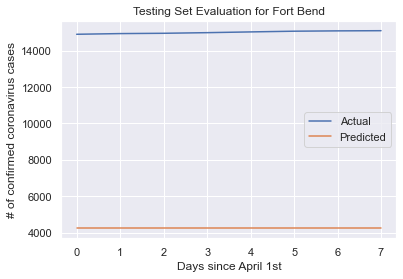

MAE: 10778.668199251451
MSE: 116184454.01370382
Weight: [-1.79227717e-22 -2.21948472e-22  4.65047252e-23  6.08460482e-07
  3.17313242e-07 -2.01058074e-23  1.14707831e-22  1.21692096e-06
  6.34626485e-07 -4.40962996e-24  2.00343852e-07  1.04479681e-07
  6.90927355e-07  6.23362266e-07  4.00488967e-07 -2.00169031e-24
  4.74329058e-23  2.43384193e-06  1.26925297e-06  1.65962418e-23
  4.00687705e-07  2.08959363e-07  1.38185471e-06  1.24672453e-06
  8.00977935e-07  1.46157202e-24  6.59659260e-08  3.44013498e-08
  2.27497187e-07  2.05250466e-07  1.31866415e-07  7.00048373e-07
  6.85660312e-07  6.30429545e-07  4.51825573e-07]


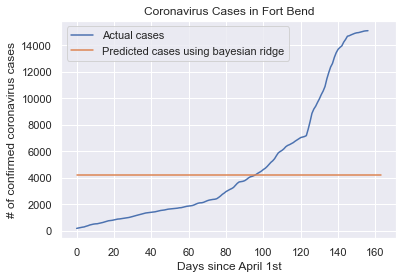

Completed: Fort Bend


/Users/irpan/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/irpan/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


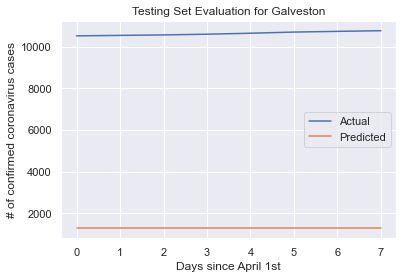

MAE: 9378.604167414469
MSE: 87965783.43416554


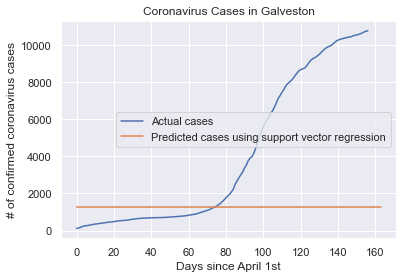

Completed: Galveston
Fitting 3 folds for each of 200 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 200 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    5.2s finished
/Users/irpan/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/irpan/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


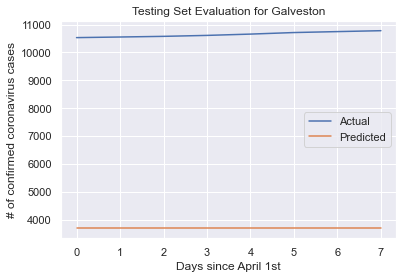

MAE: 6957.897225912955
MSE: 48419901.11148873
Weight: [-1.74573459e-22 -1.56099792e-21 -1.17364548e-21  2.80999192e-06
 -2.54238567e-07  7.10732116e-22 -4.52836050e-23  5.61998383e-06
 -5.08477134e-07  8.84546066e-23  8.85969019e-07 -8.01594811e-08
  1.48650509e-06  9.81468564e-07 -1.40179432e-06  3.43946825e-24
 -4.40631774e-22  1.12399677e-05 -1.01695427e-06  1.11408578e-22
  1.77193804e-06 -1.60318962e-07  2.97301018e-06  1.96293713e-06
 -2.80358863e-06  3.09911454e-23  2.79339274e-07 -2.52736730e-08
  4.68683717e-07  3.09449552e-07 -4.41975056e-07  1.50684265e-07
  4.15991222e-07 -3.76312342e-08 -2.03077565e-06]


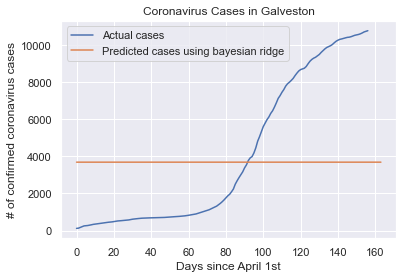

Completed: Galveston


/Users/irpan/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/irpan/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


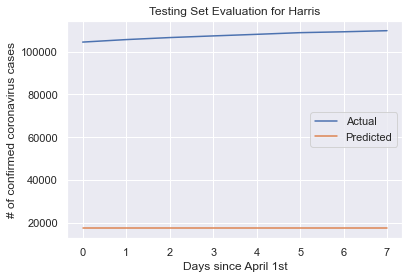

MAE: 90291.02082659784
MSE: 8155509619.203831


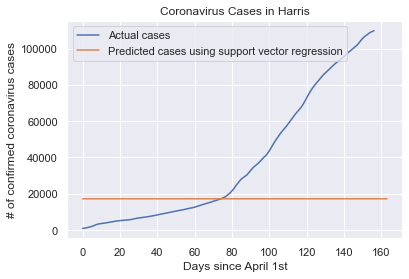

Completed: Harris
Fitting 3 folds for each of 200 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    3.6s finished
/Users/irpan/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/irpan/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


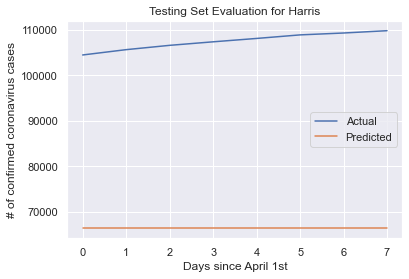

MAE: 41167.205473691516
MSE: 1697779983.8078418
Weight: [ 3.40650811e+00  6.81301617e+00  3.40650809e+00 -1.00063291e+03
  1.52384218e+03  1.36260323e+01  6.81301618e+00 -2.00126583e+03
  3.04768436e+03  3.40650808e+00 -1.00063291e+03  1.52384218e+03
  1.54202016e+04 -8.94030909e+03 -2.97056413e+03  2.72520647e+01
  1.36260323e+01 -4.00253165e+03  6.09536871e+03  6.81301617e+00
 -2.00126583e+03  3.04768436e+03  3.08404033e+04 -1.78806182e+04
 -5.94112826e+03  3.40650809e+00 -1.00063291e+03  1.52384218e+03
  1.54202016e+04 -8.94030909e+03 -2.97056413e+03  5.21764148e+04
  1.09107338e+04 -1.70954600e+04 -1.58700889e+04]


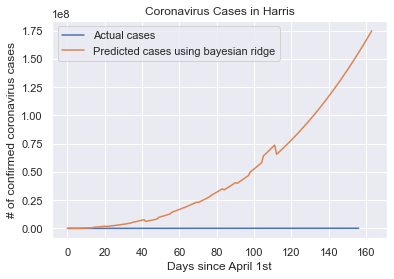

Completed: Harris


/Users/irpan/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/irpan/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


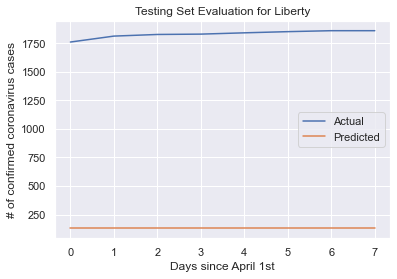

MAE: 1701.75
MSE: 2896892.194444444


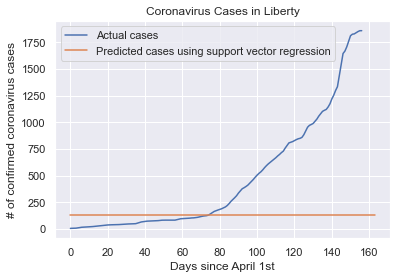

Completed: Liberty
Fitting 3 folds for each of 200 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 312 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    1.5s finished
/Users/irpan/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/irpan/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


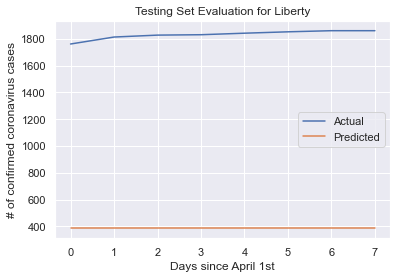

MAE: 1445.5918009938641
MSE: 2090674.7870451282
Weight: [ 4.52721802e+00  9.05443603e+00  4.94305435e-02  7.66731429e-15
 -1.03992599e-18  1.81088721e+01  9.88610869e-02  1.96187501e-18
  6.64269012e-22  5.39708629e-04 -7.33834391e-20  4.09260113e-34
  9.44909379e-34 -7.52316385e-34 -9.62964972e-35  3.62177441e+01
  1.97722174e-01  5.40727401e-37  2.17162133e-51  1.07941726e-03
 -8.90209476e-67  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  5.89282220e-06  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00]


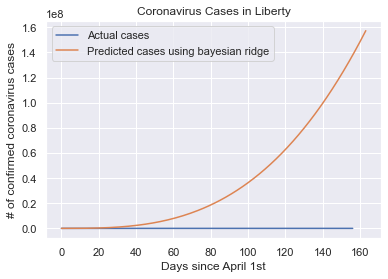

Completed: Liberty


/Users/irpan/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/irpan/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


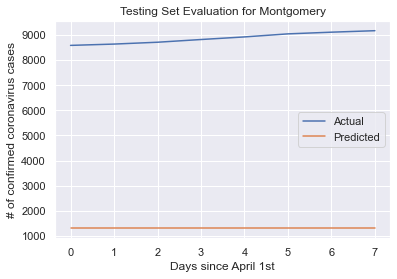

MAE: 7563.6249973181
MSE: 57251314.22331913


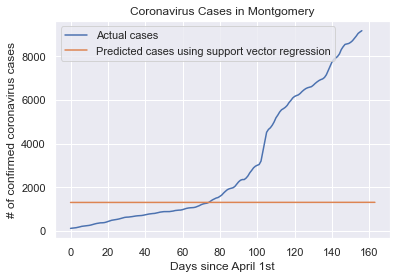

Completed: Montgomery
Fitting 3 folds for each of 200 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 200 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    3.8s finished
/Users/irpan/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/irpan/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


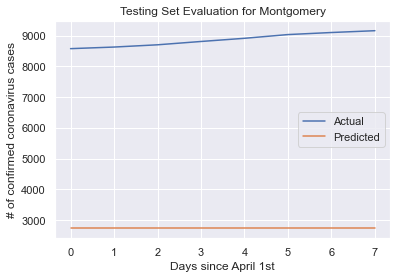

MAE: 6134.962702563273
MSE: 37680658.48510635
Weight: [ 8.43378243e-22  1.43392800e-20  3.44413318e-21  1.06890739e-05
  4.09782959e-06  1.05250867e-21  1.47070823e-21  2.13781479e-05
  8.19565917e-06 -5.33628390e-24  2.10852076e-06  8.08335577e-07
  1.30508630e-05  9.95575520e-06  4.64156289e-06 -1.88860249e-22
  8.47828625e-22  4.27562958e-05  1.63913183e-05  1.21163647e-23
  4.21704152e-06  1.61667115e-06  2.61017261e-05  1.99115104e-05
  9.28312578e-06  1.32464218e-22  4.15925628e-07  1.59451825e-07
  2.57440596e-06  1.96386671e-06  9.15592105e-07  1.42119273e-05
  1.19500716e-05  9.19633229e-06  4.73810878e-06]


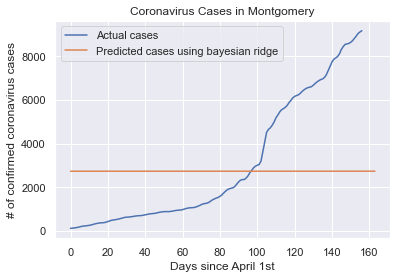

Completed: Montgomery


In [314]:

# Building the model

counties = list(df_confirmed_cases_processed['Admin2'])

for county in counties:
    confirmed = []
    #testing = [] 
    pop_density = [] 

    # mobility data
    walking_weekday = [] 
    walking_weekend = [] 
    walking = []
    walking_weekday_window = 7
    walking_weekend_window = 7
    
    # adjust window size for mobility
    
    
    # get cases in sequential order for each county
    for i in range(len(dates_starting_april)):
        confirmed.append(df_confirmed_cases_processed[df_confirmed_cases_processed.Admin2==county][dates_starting_april[i]].sum())
        pop_density.append(df_population[df_population.Admin2==county]['Population Density Scaled'].max())
        #testing.append(new_data[new_data.date==unique_dates[i]][new_data.county==county].totalTestResults.sum())
        
        # determines if it is a weekend or weekday 
        if weekday_or_weekend(dates_starting_april[i]): 
            walking_weekend.append(get_mobility('walking', county, dates_starting_april[i]))
        else:
            walking_weekday.append(get_mobility('walking', county, dates_starting_april[i]))
        
#         remainder = i % window_size 
#         if i - remainder + window_size < date_length:
#             walking.append(get_mobility_by_county('walking', county, dates_starting_april[i-remainder], dates_starting_april[i-remainder+window_size-1], 'median'))
#         else:
#             # if extrapolating use the mobility average from the last few days based on the window size
#             delta = date_length % window_size 
#             walking.append(get_mobility_by_county('walking', county, dates_starting_april[date_length-delta-1], dates_starting_april[date_length-1], 'median'))


    # remove any decreases in cum testing and confirmed cases
    for i in range(len(confirmed)):
        if i != 0:
#             if testing[i] < testing[i-1]:
#                 testing[i] = testing[i-1]
            if confirmed[i] < confirmed[i-1]:
                confirmed[i] = confirmed[i-1]
    
    # remove 0 in mobility from both weekday and weekend data (there are few null values from Apple's mobility data)
    for i in range(len(walking_weekend)):       
        if walking_weekend[i] == 0 and i != 0:
            walking_weekend[i] = walking_weekend[i-1]
            
    for i in range(len(walking_weekday)):
        if walking_weekday[i] == 0 and i != 0:
            walking_weekday[i] = walking_weekday[i-1]
            
    
    # taking window average for mobility 
    walking_weekday_avg = window_average(7, walking_weekday, 'mean')
    walking_weekend_avg = window_average(7, walking_weekend, 'mean')

    
    # making sure the shape of the mobility arrays match 
    r_walking_weekday_avg = [] 
    r_walking_weekend_avg = [] 
    
    k = 0 
    j = 0 
    for i in range(len(dates_starting_april)):
        if i % walking_weekday_window == 0 and i != 0:
            if k + walking_weekday_window < len(walking_weekday_avg):
                k += walking_weekday_window
            else:
                k = len(walking_weekday_avg) - 1 
                
            if j + walking_weekend_window < len(walking_weekend_avg):
                j += walking_weekend_window
            else:
                j = len(walking_weekend_avg) - 1
        
        r_walking_weekday_avg.append(walking_weekday_avg[k])
        r_walking_weekend_avg.append(walking_weekend_avg[j])
        

    # take moving average for confirmed cases
    confirmed = moving_confirmed_cases(confirmed, 3)

#     # future testing extrapolations from poylnomial prediction 
#     future_testing = future_testing_extrapolation(dates_starting_april, testing, future_days, county)
#     for i in future_testing:
#         testing.append(testing[-1] + i)
    
    #testing = np.array(testing).reshape(-1, 1)
    confirmed = np.array(confirmed).reshape(-1, 1)
    r_walking_weekday_avg = np.array(r_walking_weekday_avg).reshape(-1, 1)
    r_walking_weekend_avg = np.array(r_walking_weekend_avg).reshape(-1, 1)
    
    min_max_scaler = MinMaxScaler()
    #testing = min_max_scaler.fit_transform(testing)
    r_walking_weekday_avg = min_max_scaler.fit_transform(r_walking_weekday_avg)
    r_walking_weekend_avg = min_max_scaler.fit_transform(r_walking_weekend_avg)
    
    # combining the two features
    X = [] 
    future_forecast = []
    
    for i in range(len(dates_starting_april)):
        #X.append([dates_starting_april[i][0], pop_density[0], testing[i][0], r_walking_weekday_avg[i][0], r_walking_weekend_avg[i][0]])
        X.append([dates_starting_april[i][0], pop_density[0], r_walking_weekday_avg[i][0], r_walking_weekend_avg[i][0]])
    
    X = np.array(X, object).reshape(-1, 4)
    
    for i in range(len(future_days)):
        if i < len(dates_starting_april):
            #future_forecast.append([future_days[i][0], pop_density[0], testing[i][0], r_walking_weekday_avg[i][0], r_walking_weekend_avg[i][0]])
            future_forecast.append([future_days[i][0], pop_density[0], r_walking_weekday_avg[i][0], r_walking_weekend_avg[i][0]])
        else:
            #future_forecast.append([future_days[i][0], pop_density[0], testing[i][0], r_walking_weekday_avg[-1][0], r_walking_weekend_avg[-1][0]])
            future_forecast.append([future_days[i][0], pop_density[0], r_walking_weekday_avg[-1][0], r_walking_weekend_avg[-1][0]])
            
    future_forecast = np.array(future_forecast, object).reshape(-1, 4)
    
    # splitting into training and testing sets 
    X_train, X_test, y_train, y_test = train_test_split(X, confirmed, shuffle=False, test_size=0.05)
    svm_reg(X_train, X_test, y_train, y_test, future_forecast, county)
    bayesian_ridge(X_train, X_test, y_train, y_test, future_forecast, county)
    

/Users/irpan/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/irpan/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


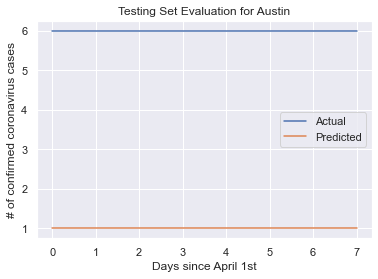

MAE: 5.0
MSE: 25.0


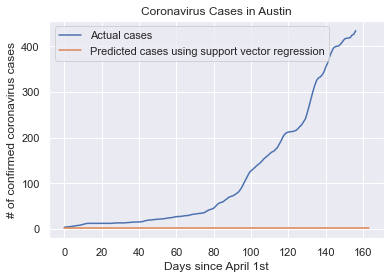

Completed: Austin
Fitting 3 folds for each of 200 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    7.5s finished
/Users/irpan/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/irpan/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


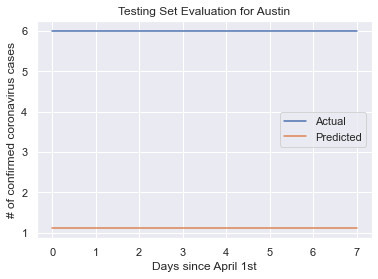

MAE: 4.891544082708974
MSE: 23.927203513085175
Weight: [ 1.30406579e-02  2.60813157e-02  1.97215226e-31 -7.75215129e-33
 -2.62700548e-34  5.21626314e-02  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  1.04325263e-01
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00]


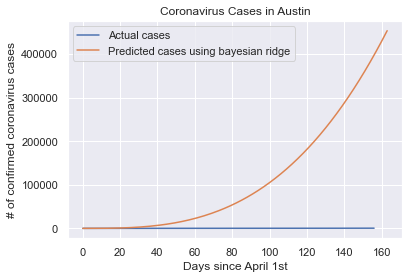

Completed: Austin


/Users/irpan/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/irpan/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


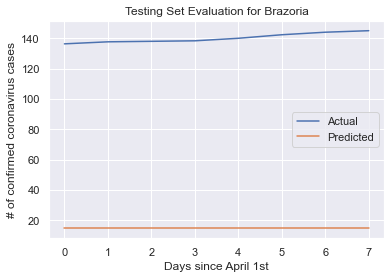

MAE: 125.54166712618962
MSE: 15769.680670934114


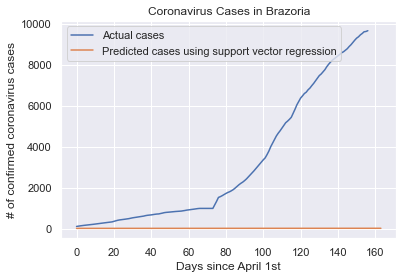

Completed: Brazoria
Fitting 3 folds for each of 200 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 296 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    2.8s finished
/Users/irpan/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/irpan/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


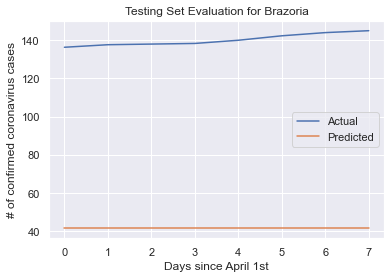

MAE: 98.62042128910824
MSE: 9734.957981352301
Weight: [ 1.07240578e-14  2.06950237e-14  2.92926823e-14  1.55358566e+00
 -2.41623349e-01  5.85000701e-16 -5.50765623e-15  3.10717131e+00
 -4.83246699e-01 -2.19016114e-18  1.30897510e-01 -2.03579987e-02
  2.48973842e+00  6.24350055e-01 -9.10185357e-01  4.10924550e-17
 -8.38582951e-15  6.21434262e+00 -9.66493397e-01  6.05181456e-17
  2.61795020e-01 -4.07159974e-02  4.97947683e+00  1.24870011e+00
 -1.82037071e+00  1.38329092e-17  1.10287824e-02 -1.71526515e-03
  2.09773151e-01  5.26046743e-02 -7.66877553e-02  2.94198114e+00
  1.44152104e+00 -2.33048937e-01 -1.53959124e+00]


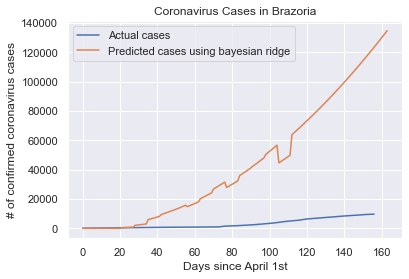

Completed: Brazoria


/Users/irpan/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/irpan/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


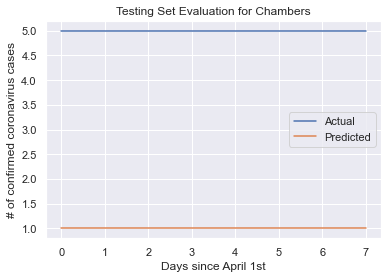

MAE: 4.0
MSE: 16.0


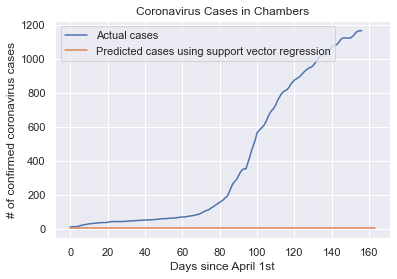

Completed: Chambers
Fitting 3 folds for each of 200 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 312 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    1.4s finished
/Users/irpan/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/irpan/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


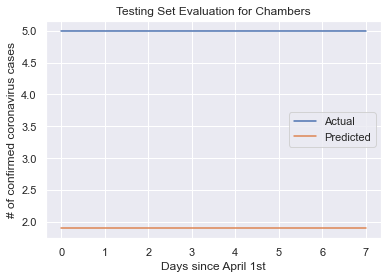

MAE: 3.102605175651476
MSE: 9.626158875979327
Weight: [ 2.23217503e-02  4.46435005e-02  2.21242962e-04 -2.44482641e-18
 -3.28192840e-23  8.92870011e-02  4.42485925e-04  2.67823862e-21
  1.53517029e-21  2.19285888e-06 -3.37675590e-25 -2.82118644e-37
  0.00000000e+00  3.76158192e-36 -1.83670992e-40  1.78574002e-01
  8.84971850e-04  1.00893489e-43 -4.07831529e-55  4.38571777e-06
 -1.08668149e-70  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  2.17346126e-08  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00]


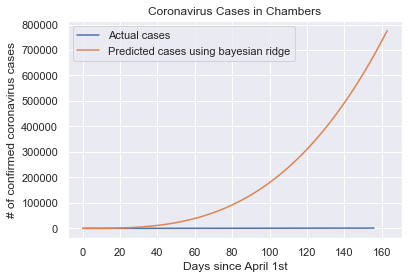

Completed: Chambers


/Users/irpan/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/irpan/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


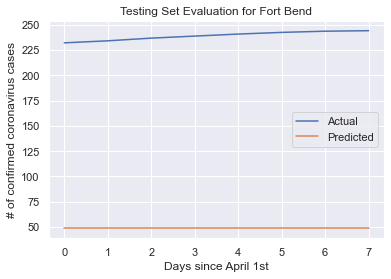

MAE: 190.3125008714164
MSE: 36236.18435946065


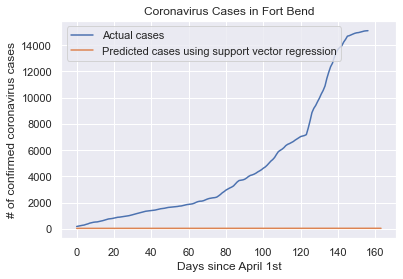

Completed: Fort Bend
Fitting 3 folds for each of 200 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 200 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    2.6s finished
/Users/irpan/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/irpan/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


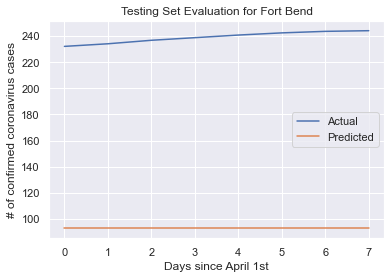

MAE: 146.17462002581073
MSE: 21384.35591121793
Weight: [ 1.08347104e-12 -3.67540999e-13 -4.16285880e+01  5.44768719e+00
 -1.28319044e-02 -3.79340246e-14  8.54010799e+00  2.72384360e+00
 -6.41595219e-03  4.35639556e+01  1.65450666e+01 -3.89715314e-02
  1.02301545e+01  4.80764621e+00 -2.15584851e+00 -2.42163827e-14
  2.83503297e+00  1.36192180e+00 -3.20797610e-03  2.21864029e+01
  8.27253329e+00 -1.94857657e-02  5.11507723e+00  2.40382311e+00
 -1.07792425e+00  1.94290311e+02  5.02487053e+01 -1.18359693e-01
  3.10698065e+01  1.46012104e+01 -6.54748627e+00  1.41795297e+01
  1.00938894e+01  4.38100838e+00 -3.23955052e+00]


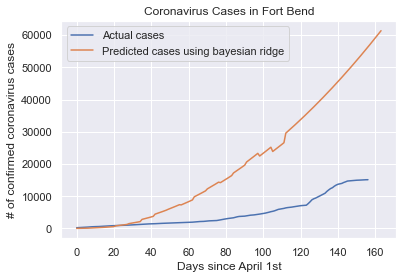

Completed: Fort Bend


/Users/irpan/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/irpan/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


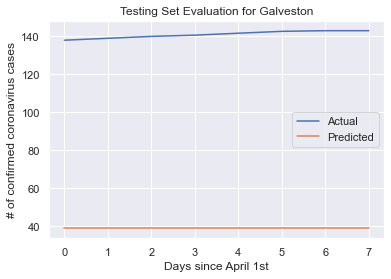

MAE: 102.00000080077368
MSE: 10407.166830024496


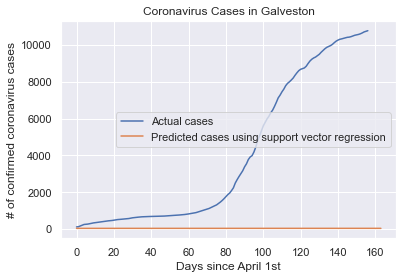

Completed: Galveston
Fitting 3 folds for each of 200 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    3.0s finished
/Users/irpan/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/irpan/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


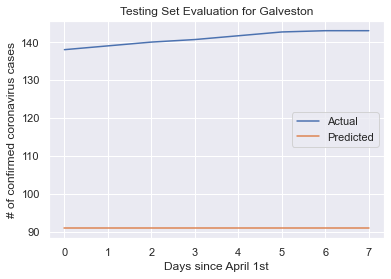

MAE: 50.098742025936644
MSE: 2513.050619248017
Weight: [ 2.10416652e-02  4.20833035e-02  6.63427752e-03  2.75366800e+01
  1.23765390e+01  8.41666155e-02  1.32685476e-02  5.50733601e+01
  2.47530780e+01  2.09174091e-03  8.68210519e+00  3.90222835e+00
  1.05230542e+02 -2.68941530e+02 -1.70926468e+02  1.68333238e-01
  2.65370961e-02  1.10146720e+02  4.95061561e+01  4.18347990e-03
  1.73642104e+01  7.80445671e+00  2.10461083e+02 -5.37883060e+02
 -3.41852937e+02  6.59508773e-04  2.73740154e+00  1.23034284e+00
  3.31783872e+01 -8.47952132e+01 -5.38918118e+01 -7.57703051e+02
  5.36226767e+02  4.16757582e+02  6.54992590e+02]


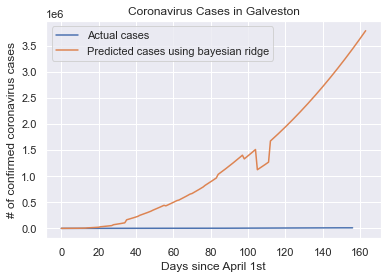

Completed: Galveston


/Users/irpan/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/irpan/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


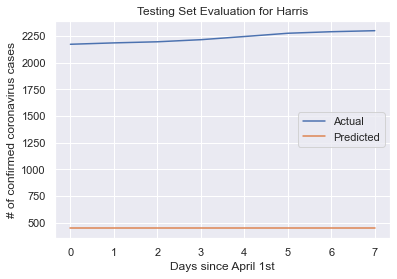

MAE: 1789.5624932644944
MSE: 3204697.243253894


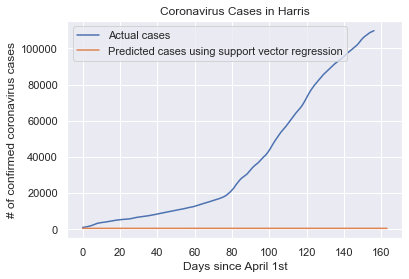

Completed: Harris
Fitting 3 folds for each of 200 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 312 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    2.0s finished
/Users/irpan/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/irpan/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


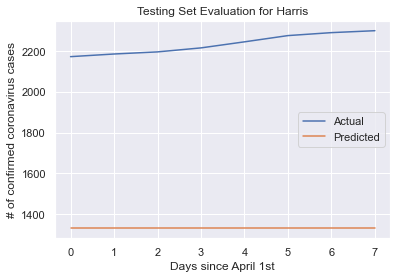

MAE: 904.9323375043756
MSE: 821065.8614159942
Weight: [ 1.04798054e-10 -5.00117218e-10  1.53011118e-10 -3.19909764e+01
  9.82836141e+01  3.44691255e-11  8.80131170e-12 -1.59954882e+01
  4.91418070e+01  1.14245433e-13 -3.19909764e+01  9.82836141e+01
  3.64207816e+02 -2.43321404e+02 -1.77896758e+01 -1.70258011e-11
 -5.78739192e-12 -7.99774411e+00  2.45709035e+01 -1.36119552e-11
 -1.59954882e+01  4.91418070e+01  1.82103908e+02 -1.21660702e+02
 -8.89483792e+00  9.60386850e-12 -3.19909764e+01  9.82836141e+01
  3.64207816e+02 -2.43321404e+02 -1.77896758e+01  1.20009537e+03
  2.47927840e+02 -4.45203960e+02 -4.13743224e+02]


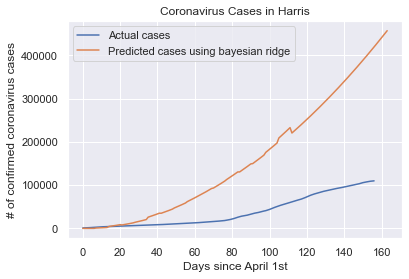

Completed: Harris


/Users/irpan/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/irpan/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


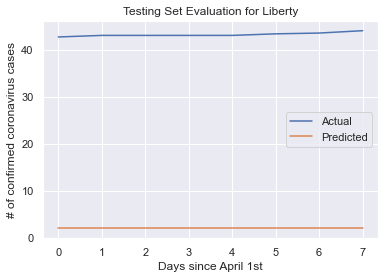

MAE: 41.1875
MSE: 1696.5590277777778


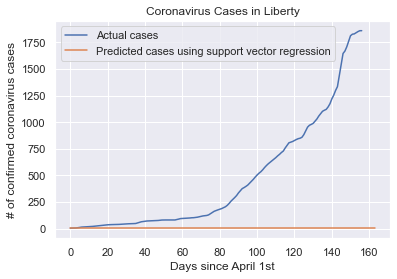

Completed: Liberty
Fitting 3 folds for each of 200 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 312 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    1.2s finished
/Users/irpan/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/irpan/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


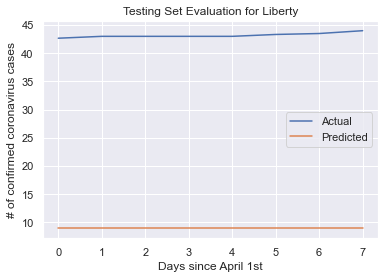

MAE: 34.24589294567531
MSE: 1172.9300551744316
Weight: [ 1.05192279e-01  2.10384558e-01  1.14854453e-03  5.04478919e-17
  1.25965127e-21  4.20769115e-01  2.29708907e-03  4.72017697e-21
  6.01483762e-24  1.25404123e-05 -9.83412346e-22  5.88687571e-35
  2.81413348e-35 -8.65163842e-36 -7.05296610e-37  8.41538230e-01
  4.59417814e-03  2.05711511e-38  3.39315832e-53  2.50808246e-05
 -8.69345192e-69  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  1.36922806e-07  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00]


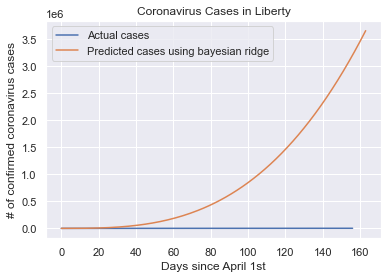

Completed: Liberty


/Users/irpan/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/irpan/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


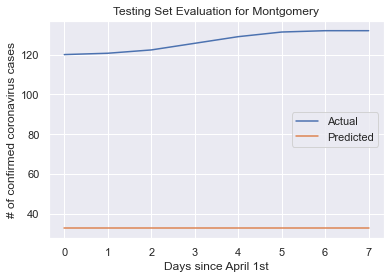

MAE: 93.95833103294716
MSE: 8851.207901052436


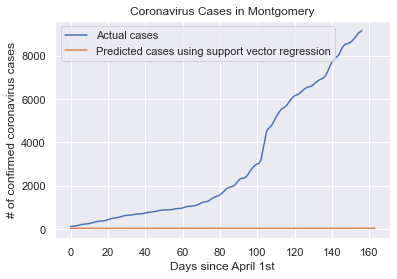

Completed: Montgomery
Fitting 3 folds for each of 200 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 200 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    2.7s finished
/Users/irpan/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/irpan/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


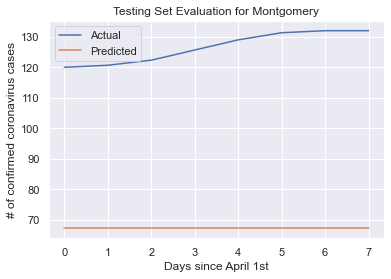

MAE: 59.44755994800883
MSE: 3557.0523143276596
Weight: [ 2.76222335e-02  5.52444669e-02  5.44874634e-03 -2.13392150e+00
  1.04831108e+00  1.10488934e-01  1.08974927e-02 -4.26784301e+00
  2.09662215e+00  1.07481666e-03 -4.20936164e-01  2.06789258e-01
  1.26488515e+01 -1.20406474e+01  2.45514738e+00  2.20977868e-01
  2.17949854e-02 -8.53568601e+00  4.19324431e+00  2.14963332e-03
 -8.41872329e-01  4.13578516e-01  2.52977029e+01 -2.40812948e+01
  4.91029475e+00  2.12017729e-04 -8.30336328e-02  4.07911336e-02
  2.49510538e+00 -2.37513138e+00  4.84301001e-01  8.76055665e+01
  7.63594452e+00 -1.96863421e+01 -4.44727404e+00]


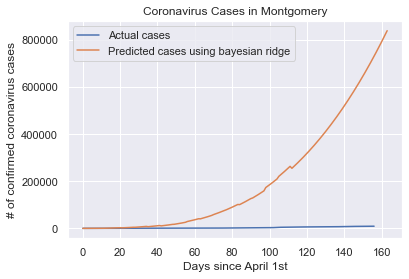

Completed: Montgomery


In [320]:

# Building the model

counties = list(df_confirmed_cases_processed['Admin2'])

for county in counties:
    confirmed = []
    death = []
    #testing = [] 
    pop_density = [] 

    # mobility data
    walking_weekday = [] 
    walking_weekend = [] 
    walking = []
    walking_weekday_window = 7
    walking_weekend_window = 7
    
    # adjust window size for mobility
    
    
    # get cases in sequential order for each county
    for i in range(len(dates_starting_april)):
        confirmed.append(df_confirmed_cases_processed[df_confirmed_cases_processed.Admin2==county][dates_starting_april[i]].sum())
        death.append(df_death_cases_processed[df_death_cases_processed.Admin2==county][dates_starting_april[i]].sum())
        pop_density.append(df_population[df_population.Admin2==county]['Population Density Scaled'].max())
        #testing.append(new_data[new_data.date==unique_dates[i]][new_data.county==county].totalTestResults.sum())
        
        # determines if it is a weekend or weekday 
        if weekday_or_weekend(dates_starting_april[i]): 
            walking_weekend.append(get_mobility('walking', county, dates_starting_april[i]))
        else:
            walking_weekday.append(get_mobility('walking', county, dates_starting_april[i]))
        
#         remainder = i % window_size 
#         if i - remainder + window_size < date_length:
#             walking.append(get_mobility_by_county('walking', county, dates_starting_april[i-remainder], dates_starting_april[i-remainder+window_size-1], 'median'))
#         else:
#             # if extrapolating use the mobility average from the last few days based on the window size
#             delta = date_length % window_size 
#             walking.append(get_mobility_by_county('walking', county, dates_starting_april[date_length-delta-1], dates_starting_april[date_length-1], 'median'))

    # remove any decreases in cum testing and confirmed cases
    for i in range(len(confirmed)):
        if i != 0:
#             if testing[i] < testing[i-1]:
#                 testing[i] = testing[i-1]
            if confirmed[i] < confirmed[i-1]:
                confirmed[i] = confirmed[i-1]
            if death[i] < death[i-1]:
                death[i] = death[i-1]
   
    # remove 0 in mobility from both weekday and weekend data (there are few null values from Apple's mobility data)
    for i in range(len(walking_weekend)):       
        if walking_weekend[i] == 0 and i != 0:
            walking_weekend[i] = walking_weekend[i-1]
            
    for i in range(len(walking_weekday)):
        if walking_weekday[i] == 0 and i != 0:
            walking_weekday[i] = walking_weekday[i-1]
            
    
    # taking window average for mobility 
    walking_weekday_avg = window_average(7, walking_weekday, 'mean')
    walking_weekend_avg = window_average(7, walking_weekend, 'mean')

    
    # making sure the shape of the mobility arrays match 
    r_walking_weekday_avg = [] 
    r_walking_weekend_avg = [] 
    
    k = 0 
    j = 0 
    for i in range(len(dates_starting_april)):
        if i % walking_weekday_window == 0 and i != 0:
            if k + walking_weekday_window < len(walking_weekday_avg):
                k += walking_weekday_window
            else:
                k = len(walking_weekday_avg) - 1 
                
            if j + walking_weekend_window < len(walking_weekend_avg):
                j += walking_weekend_window
            else:
                j = len(walking_weekend_avg) - 1
        
        r_walking_weekday_avg.append(walking_weekday_avg[k])
        r_walking_weekend_avg.append(walking_weekend_avg[j])
        

    # take moving average for confirmed cases and death cases
    confirmed = moving_confirmed_cases(confirmed, 3)
    death = moving_confirmed_cases(death, 3)

#     # future testing extrapolations from poylnomial prediction 
#     future_testing = future_testing_extrapolation(dates_starting_april, testing, future_days, county)
#     for i in future_testing:
#         testing.append(testing[-1] + i)
    
    #testing = np.array(testing).reshape(-1, 1)
    confirmed = np.array(confirmed).reshape(-1, 1)
    death = np.array(death).reshape(-1, 1)
    r_walking_weekday_avg = np.array(r_walking_weekday_avg).reshape(-1, 1)
    r_walking_weekend_avg = np.array(r_walking_weekend_avg).reshape(-1, 1)
    
    min_max_scaler = MinMaxScaler()
    #testing = min_max_scaler.fit_transform(testing)
    r_walking_weekday_avg = min_max_scaler.fit_transform(r_walking_weekday_avg)
    r_walking_weekend_avg = min_max_scaler.fit_transform(r_walking_weekend_avg)
    
    # combining the two features
    X = [] 
    future_forecast = []
    
    for i in range(len(dates_starting_april)):
        #X.append([dates_starting_april[i][0], pop_density[0], testing[i][0], r_walking_weekday_avg[i][0], r_walking_weekend_avg[i][0]])
        X.append([dates_starting_april[i][0], pop_density[0], r_walking_weekday_avg[i][0], r_walking_weekend_avg[i][0]])
    
    X = np.array(X, object).reshape(-1, 4)
    
    for i in range(len(future_days)):
        if i < len(dates_starting_april):
            #future_forecast.append([future_days[i][0], pop_density[0], testing[i][0], r_walking_weekday_avg[i][0], r_walking_weekend_avg[i][0]])
            future_forecast.append([future_days[i][0], pop_density[0], r_walking_weekday_avg[i][0], r_walking_weekend_avg[i][0]])
        else:
            #future_forecast.append([future_days[i][0], pop_density[0], testing[i][0], r_walking_weekday_avg[-1][0], r_walking_weekend_avg[-1][0]])
            future_forecast.append([future_days[i][0], pop_density[0], r_walking_weekday_avg[-1][0], r_walking_weekend_avg[-1][0]])
            
    future_forecast = np.array(future_forecast, object).reshape(-1, 4)

    # splitting into training and testing sets 
    X_train, X_test, y_train, y_test = train_test_split(X, death, shuffle=False, test_size=0.05)
    svm_reg(X_train, X_test, y_train, y_test, future_forecast, county)
    bayesian_ridge(X_train, X_test, y_train, y_test, future_forecast, county)
    